In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris

In [3]:
df = load_iris()

In [ ]:
df

In [21]:
df2 = pd.DataFrame({
    'sepal length':df.data[:,0],
    'sepal width':df.data[:,1],
    'petal length':df.data[:,2],
    'petal width':df.data[:,3],
    'species':df.target
})

In [ ]:
df2

In [31]:
corr_matrix = df2.corr()
corr_matrix['species'].sort_values(ascending = False)

species         1.000000
petal width     0.956547
petal length    0.949035
sepal length    0.782561
sepal width    -0.426658
Name: species, dtype: float64

<Axes: >

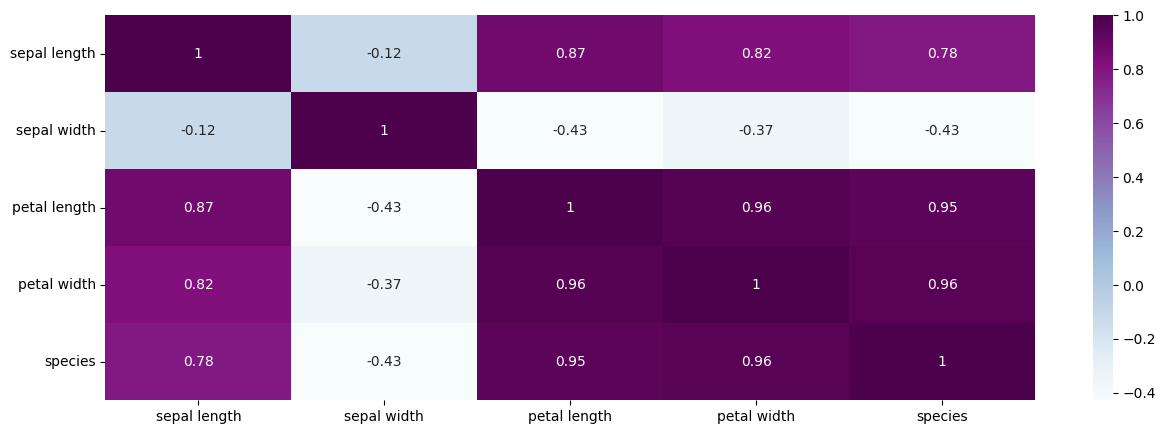

In [33]:
#@title Confusion Metrix
from matplotlib import pyplot as plt
import seaborn as sns
corr = df2.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [23]:
features = df2[['sepal length','sepal width','petal length','petal width','species']]

In [24]:
features.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [25]:
x = features.drop('species',axis =1)
y = features['species']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 23)

In [29]:
#@title RF model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = RandomForestRegressor()
model.fit(x_train,y_train)
predict_with_tree = model.predict(x_test)
mse_tree = mean_squared_error(y_test, predict_with_tree)
mae_tree = mean_absolute_error(y_test, predict_with_tree)
print("mean squared error for tree= ",mse_tree)
print("mean absoluate error for tree= ",mae_tree)

from sklearn.metrics import r2_score
acc = r2_score(y_test, predict_with_tree)
print(acc*100)

mean squared error for tree=  0.016863333333333327
mean absoluate error for tree=  0.03366666666666666
97.68643292682927
